In [1]:
import numpy as np
from simulation import Simulation
from lineages import Lineage
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
time_res = np.arange(0.025, 8, 0.2)
print(time_res)

[0.025 0.225 0.425 0.625 0.825 1.025 1.225 1.425 1.625 1.825 2.025 2.225
 2.425 2.625 2.825 3.025 3.225 3.425 3.625 3.825 4.025 4.225 4.425 4.625
 4.825 5.025 5.225 5.425 5.625 5.825 6.025 6.225 6.425 6.625 6.825 7.025
 7.225 7.425 7.625 7.825]


In [4]:
simulations = []
for x in range(500):
    sim = Simulation(dt=1/120, Delta=np.random.uniform(8, 12), D_sd=2, tau=np.random.uniform(18, 22), t_sd=3) # 2fps, averge doubling time 20 mins, adder at 10
    sim.run(length=200, vm=np.random.uniform(5, 25), n=2) # initialise mother cell with various lengths
    simulations.append(sim)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 34489.35it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 50228.03it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 39596.66it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 32376.82it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 30523.08it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 77726.33it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 74054.59it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 36807.85it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 54140.72it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 47964.87it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 51484.28it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 30460.51it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 38552.18it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:00<00:00, 29812.89it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24000/24000 [00:01<00:00, 22291.92it/s]


In [5]:
lineages = Lineage(simulations, cell=-1)

In [6]:
div_times, div_lengths = lineages.collect_downsampled_data(n=240) # 2 mins time step

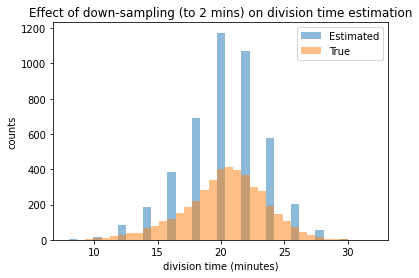

In [8]:
true_div_times = [l[j+1] - l[j] for l in lineages.divisions_t for j in range(len(l) - 1)]
est_div_times = [item for sublist in div_times for item in sublist]
count1, bins, p1 = plt.hist(np.array(est_div_times), 37, alpha=0.5, label="Estimated")
count2, bins, p2 = plt.hist(np.array(true_div_times), alpha=0.5, label="True", bins=bins)
plt.legend()
plt.xlabel("division time (minutes)")
plt.ylabel("counts")
plt.title("Effect of down-sampling (to 2 mins) on division time estimation")
plt.show()

check thrid and forth moment

adder model estimation (just maximum likelihood)

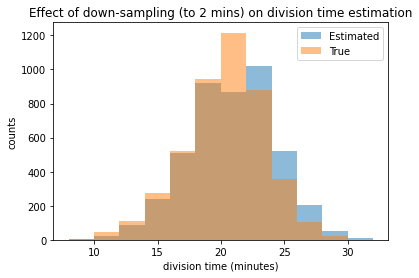

In [9]:
count1, bins, p1 = plt.hist(np.array(est_div_times), 12, alpha=0.5, label="Estimated")
count2, bins, p2 = plt.hist(np.array(true_div_times), alpha=0.5, label="True", bins=bins)
plt.legend()
plt.xlabel("division time (minutes)")
plt.ylabel("counts")
plt.title("Effect of down-sampling (to 2 mins) on division time estimation")
plt.show()

In [10]:
# c1, bins = np.histogram(np.array(est_div_times), 20)
# c2, bins = np.histogram(np.array(true_div_times), bins=bins)
# print(c2)
# print(count2)

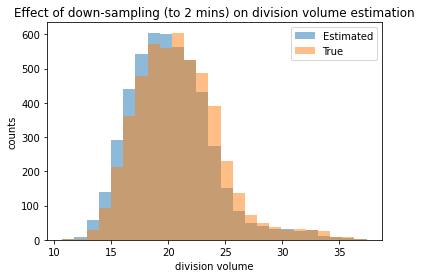

In [13]:
true_div_lengths = [lineages.lineages[l][j] for l in range(len(lineages.divisions_idx)) for j in lineages.divisions_idx[l]]
est_div_lengths = [item for sublist in div_lengths for item in sublist]
count1, bins, p1 = plt.hist(np.array(est_div_lengths), 25, alpha=0.5, label="Estimated")
count2, bins, p2 = plt.hist(np.array(true_div_lengths), alpha=0.5, label="True", bins=bins)
plt.legend()
plt.xlabel("division volume")
plt.ylabel("counts")
plt.title("Effect of down-sampling (to 2 mins) on division volume estimation")
plt.show()

The bins width should be carefully considered. There should also be some better ways of comparing distributions and quantifying their differences. 

In [14]:
errors_t = []
errors_v = []
mean_true = []
var_true = []
mean_est = []
var_est = []
mean2_true = []
var2_true = []
mean2_est = []
var2_est = []
sk_true = []
kur_true = []
sk_est = []
kur_est = []
sk2_true = []
kur2_true = []
sk2_est = []
kur2_est = []
for t in time_res:
    div_times, div_lengths = lineages.collect_downsampled_data(n=int(t*120))
    
    bin_number = 50
    
    true_div_times = [l[j+1] - l[j] for l in lineages.divisions_t for j in range(len(l) - 1)]
    est_div_times = [item for sublist in div_times for item in sublist]
    m1 = np.mean(true_div_times)
    m2 = np.mean(est_div_times)
    v1 = np.var(true_div_times)
    v2 = np.var(est_div_times)
    mean_true.append(m1)
    mean_est.append(m2)
    var_true.append(v1)
    var_est.append(v2)
    sk_true.append(skew(true_div_times))
    sk_est.append(skew(est_div_times))
    kur_true.append(kurtosis(true_div_times))
    kur_est.append(kurtosis(est_div_times))
    count1, bins = np.histogram(np.array(est_div_times), bin_number)
    count2, bins = np.histogram(np.array(true_div_times), bins=bins)
    errors_t.append(sum(abs(count1 - count2)))
    
    bin_number = 20
    
    true_div_lengths = [lineages.lineages[l][j] for l in range(len(lineages.divisions_idx)) for j in lineages.divisions_idx[l]]
    est_div_lengths = [item for sublist in div_lengths for item in sublist]
    m1 = np.mean(true_div_lengths)
    m2 = np.mean(est_div_lengths)
    v1 = np.var(true_div_lengths)
    v2 = np.var(est_div_lengths)
    mean2_true.append(m1)
    mean2_est.append(m2)
    var2_true.append(v1)
    var2_est.append(v2)
    sk2_true.append(skew(true_div_lengths))
    sk2_est.append(skew(est_div_lengths))
    kur2_true.append(kurtosis(true_div_lengths))
    kur2_est.append(kurtosis(est_div_lengths))
    count1, bins = np.histogram(np.array(est_div_lengths), bin_number)
    count2, bins = np.histogram(np.array(true_div_lengths), bins=bins)
    errors_v.append(sum(abs(count1 - count2)))

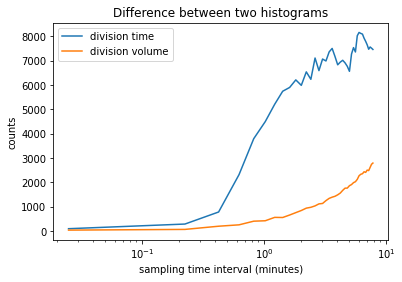

In [15]:
plt.plot(time_res, errors_t, label="division time")
plt.plot(time_res, errors_v, label="division volume")
plt.xscale("log")
plt.xlabel("sampling time interval (minutes)")
plt.ylabel("counts")
plt.title("Difference between two histograms")
plt.legend()
plt.show()

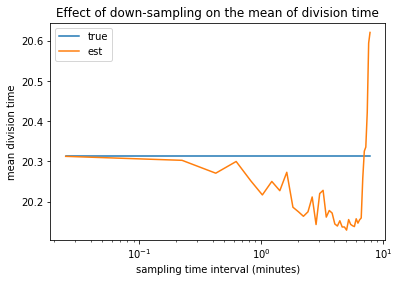

In [16]:
plt.plot(time_res, mean_true, label="true")
plt.plot(time_res, mean_est, label="est")
plt.xscale("log")
plt.xlabel("sampling time interval (minutes)")
plt.ylabel("mean division time")
plt.title("Effect of down-sampling on the mean of division time")
plt.legend()
plt.show()

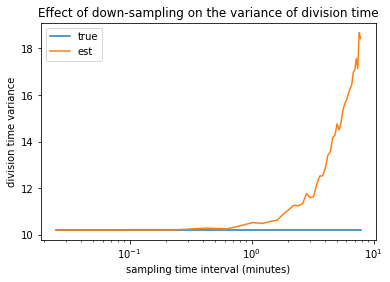

In [17]:
plt.plot(time_res, var_true, label="true")
plt.plot(time_res, var_est, label="est")
plt.xscale("log")
plt.xlabel("sampling time interval (minutes)")
plt.ylabel("division time variance")
plt.title("Effect of down-sampling on the variance of division time")
plt.legend()
plt.show()

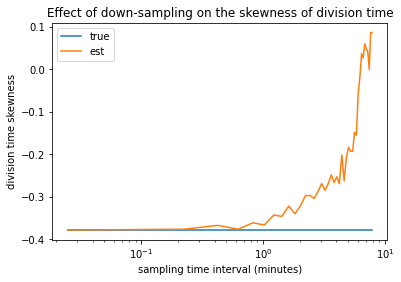

In [18]:
plt.plot(time_res, sk_true, label="true")
plt.plot(time_res, sk_est, label="est")
plt.xscale("log")
plt.xlabel("sampling time interval (minutes)")
plt.ylabel("division time skewness")
plt.title("Effect of down-sampling on the skewness of division time")
plt.legend()
plt.show()

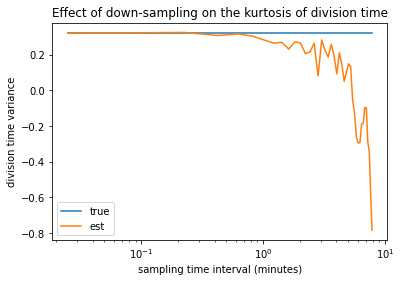

In [19]:
plt.plot(time_res, kur_true, label="true")
plt.plot(time_res, kur_est, label="est")
plt.xscale("log")
plt.xlabel("sampling time interval (minutes)")
plt.ylabel("division time variance")
plt.title("Effect of down-sampling on the kurtosis of division time")
plt.legend()
plt.show()

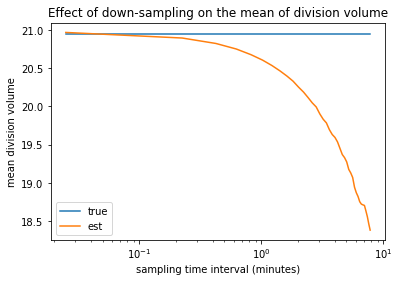

In [20]:
plt.plot(time_res, mean2_true, label="true")
plt.plot(time_res, mean2_est, label="est")
plt.xscale("log")
plt.xlabel("sampling time interval (minutes)")
plt.ylabel("mean division volume")
plt.title("Effect of down-sampling on the mean of division volume")
plt.legend()
plt.show()

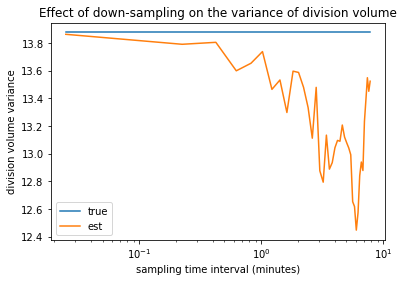

In [21]:
plt.plot(time_res, var2_true, label="true")
plt.plot(time_res, var2_est, label="est")
plt.xscale("log")
plt.xlabel("sampling time interval (minutes)")
plt.ylabel("division volume variance")
plt.title("Effect of down-sampling on the variance of division volume")
plt.legend()
plt.show()

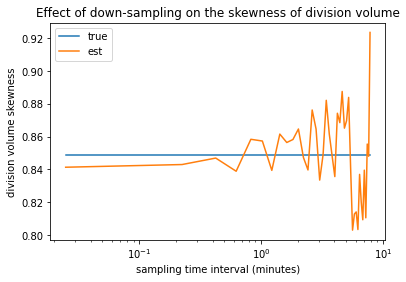

In [22]:
plt.plot(time_res, sk2_true, label="true")
plt.plot(time_res, sk2_est, label="est")
plt.xscale("log")
plt.xlabel("sampling time interval (minutes)")
plt.ylabel("division volume skewness")
plt.title("Effect of down-sampling on the skewness of division volume")
plt.legend()
plt.show()

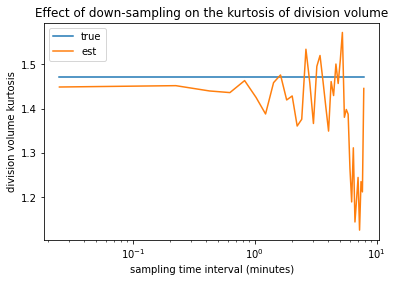

In [23]:
plt.plot(time_res, kur2_true, label="true")
plt.plot(time_res, kur2_est, label="est")
plt.xscale("log")
plt.xlabel("sampling time interval (minutes)")
plt.ylabel("division volume kurtosis")
plt.title("Effect of down-sampling on the kurtosis of division volume")
plt.legend()
plt.show()